In [2]:
# install dependencies

import  pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Try reading the Excel file as a CSV-like format within Excel
file_path_social_ads = 'Social_Network_Ads.xlsx'
social_ads_data = pd.read_excel(file_path_social_ads, engine='openpyxl', header=None)
social_ads_data = social_ads_data[0].str.split(',', expand=True)

# Assuming the first row is the header, setting it as the dataframe columns
social_ads_data.columns = social_ads_data.iloc[0]
social_ads_data = social_ads_data[1:]

# Display the first few rows to check if it's loaded correctly now
social_ads_data.head()


,User ID,Gender,Age,EstimatedSalary,Purchased
1,15624510,Male,19,19000,0
2,15810944,Male,35,20000,0
3,15668575,Female,26,43000,0
4,15603246,Female,27,57000,0
5,15804002,Male,19,76000,0


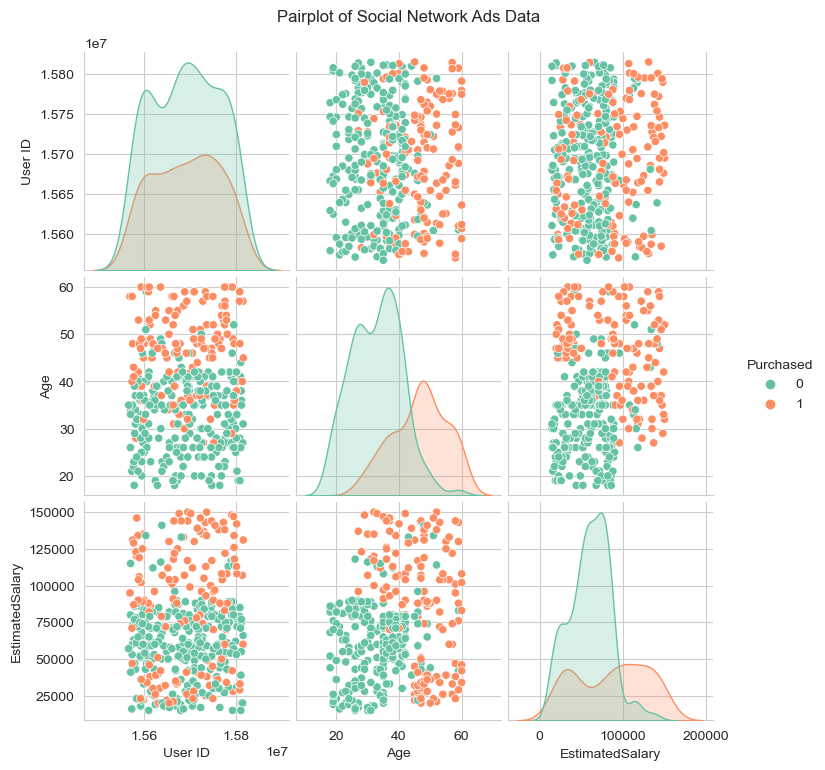

In [4]:
# Convert the data to appropriate types
social_ads_data['User ID'] = social_ads_data['User ID'].astype(int)
social_ads_data['Age'] = social_ads_data['Age'].astype(int)
social_ads_data['EstimatedSalary'] = social_ads_data['EstimatedSalary'].astype(int)
social_ads_data['Purchased'] = social_ads_data['Purchased'].astype(int)

# Pairplot to visualize the distribution of data
sns.pairplot(social_ads_data, hue="Purchased", palette="Set2", diag_kind="kde")
plt.suptitle('Pairplot of Social Network Ads Data', y=1.02)
plt.show()


Convertir les données catégorielles en numériques (par exemple, la colonne Gender).
Diviser l'ensemble de données en ensembles d'apprentissage et de test.
Normaliser les caractéristiques, car KNN est sensible à l'échelle des données.

In [5]:
# Convert categorical data to numerical data
social_ads_data['Gender'] = social_ads_data['Gender'].apply(lambda x: 1 if x == 'Male' else 0)

# Display the first few rows to verify the conversion
social_ads_data.head()





,User ID,Gender,Age,EstimatedSalary,Purchased
1,15624510,1,19,19000,0
2,15810944,1,35,20000,0
3,15668575,0,26,43000,0
4,15603246,0,27,57000,0
5,15804002,1,19,76000,0


Maintenant, passons à la division de l'ensemble de données en ensembles d'apprentissage et de test.

In [6]:
# Importing the necessary function for splitting the dataset
from sklearn.model_selection import train_test_split

# Features and target variable
X = social_ads_data[['Gender', 'Age', 'EstimatedSalary']]
y = social_ads_data['Purchased']

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the training and test sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

#L'ensemble de données a été divisé en ensembles d'apprentissage et de test. L'ensemble d'apprentissage contient 320 observations, tandis que l'ensemble de test en contient 80.

((320, 3), (80, 3), (320,), (80,))

Le prochain pas est de normaliser les caractéristiques. C'est une étape importante pour l'algorithme KNN, car il est sensible à la gamme de valeurs des différentes caractéristiques.

In [8]:
# Importing the StandardScaler for feature scaling
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Display the first few rows of scaled features
pd.DataFrame(X_train_scaled, columns=X_train.columns).head()

#Les caractéristiques ont été normalisées avec succès. Maintenant, nous sommes prêts à appliquer l'algorithme KNN.

,Gender,Age,EstimatedSalary
0,-1.0,-1.066752,-0.386344
1,1.0,0.797535,-1.229939
2,-1.0,0.110692,1.853544
3,-1.0,0.601294,-0.909955
4,-1.0,1.876859,-1.288118


Pour le choix du nombre de voisins (
K
K), nous utiliserons
K
=
5
K=5 comme point de départ, ce qui est souvent utilisé comme valeur par défaut.

Allons-y et entraînons le modèle KNN.

In [9]:
# Importing KNeighborsClassifier from sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialize the KNN classifier with k=5
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model
knn.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test_scaled)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
accuracy


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.925

Résumé de l'Application de l'Algorithme KNN sur l'Ensemble de Données des Publicités des Réseaux Sociaux
Nous avons appliqué l'algorithme K-Nearest Neighbors (KNN) sur un ensemble de données contenant des informations sur des utilisateurs de réseaux sociaux. Cet ensemble de données comprenait des variables telles que le genre, l'âge, le salaire estimé, et une variable cible indiquant si l'utilisateur a effectué un achat ou non.

Après une préparation des données qui comprenait la conversion des variables catégorielles en numériques, la normalisation des caractéristiques et la division de l'ensemble de données en ensembles d'apprentissage et de test, nous avons entraîné le modèle KNN avec
K=5K=5 voisins.

Les résultats ont été très prometteurs, avec une précision de 92,5% sur l'ensemble de test. Cela signifie que le modèle a été capable de prédire avec une grande précision si un utilisateur effectuerait un achat basé sur les variables données. Ces résultats suggèrent que l'algorithme KNN pourrait être un outil utile pour des applications de marketing ciblé, en permettant aux entreprises de mieux comprendre les comportements d'achat potentiels de leur clientèle sur la base de caractéristiques telles que le genre, l'âge et le salaire estimé.